In [1]:
pip install squarify


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

## STORY -1

In [3]:
data=pd.read_csv("https://raw.githubusercontent.com/holtzy/data_to_viz/master/Example_dataset/1_OneNum.csv")
data

,price
0,75.0
1,104.0
2,369.0
3,300.0
4,92.0
...,...
9990,97.0
9991,58.0
9992,127.0
9993,143.0


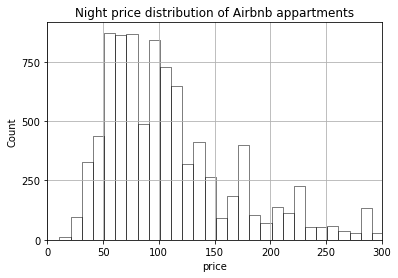

In [4]:
ax=sns.histplot(data=data,binwidth=10, x='price',color="000000",fill=False)
ax.set_xlim(0, 300)
ax.set_yticks([0,250,500,750])
plt.grid()
plt.title('Night price distribution of Airbnb appartments')
plt.show()

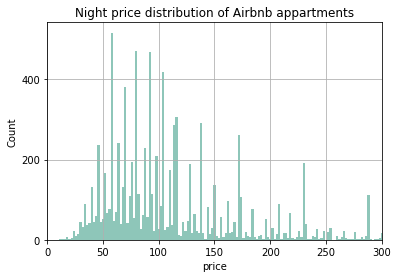

In [5]:
ax=sns.histplot(data=data,binwidth=2, x="price",color="#69b3a2")
ax.set_xlim(0, 300)
ax.set_yticks([0,200,400])
plt.title('Night price distribution of Airbnb appartments')
plt.grid()
plt.show()

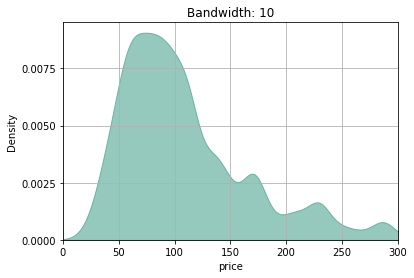

In [6]:
data2=data[data["price"] <=300] 
ax=sns.kdeplot(data=data2, x="price",color="#69b3a2",fill=True,alpha=0.7)
ax.set_xlim(0, 300)
ax.set_yticks([0.0000,0.0025,0.0050,0.0075])
plt.grid()
plt.title("Bandwidth: 10")
plt.show()

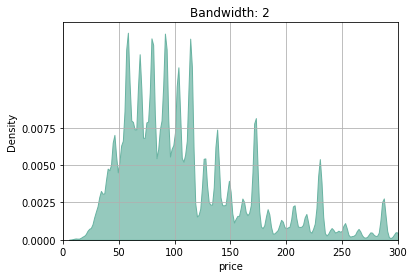

In [7]:
data2=data[data["price"] <=300] 
ax=sns.kdeplot(data=data2, x="price",color="#69b3a2",fill=True,alpha=0.7,bw_adjust=.2)
ax.set_xlim(0, 300)
ax.set_yticks([0.0000,0.0025,0.0050,0.0075])
plt.grid()
plt.title("Bandwidth: 2")
plt.show()

## STORY -2

In [8]:
dt=pd.read_csv("https://raw.githubusercontent.com/holtzy/data_to_viz/master/Example_dataset/2_TwoNum.csv")
dt

,GrLivArea,SalePrice
0,1710,208500
1,1262,181500
2,1786,223500
3,1717,140000
4,2198,250000
...,...,...
1455,1647,175000
1456,2073,210000
1457,2340,266500
1458,1078,142125


In [9]:
dt['SalePrice']=dt['SalePrice']/1000

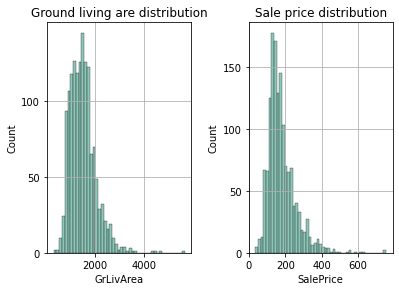

In [10]:
plt.subplot(1,2,1)
ax=sns.histplot(data=dt, x="GrLivArea",color="#69b3a2")
ax.set_yticks([0,50,100])
plt.title("Ground living are distribution")
plt.grid()

plt.subplot(1,2,2)
ax=sns.histplot(data=dt, x="SalePrice",color="#69b3a2")
ax.set_yticks([0,50,100,150])
plt.title("Sale price distribution")
plt.grid()

plt.subplots_adjust(left=0.1,
                    bottom=0.1,
                    right=0.9,
                    top=0.9,
                    wspace=0.4,
                    hspace=0.4)
plt.show()


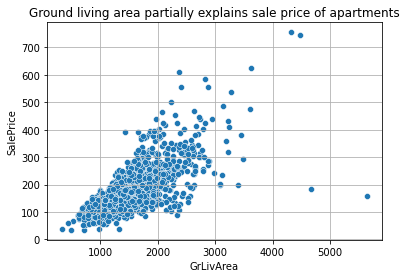

In [11]:
g=sns.scatterplot(x ='GrLivArea', y ='SalePrice', data = dt)
plt.title("Ground living area partially explains sale price of apartments")
plt.grid()

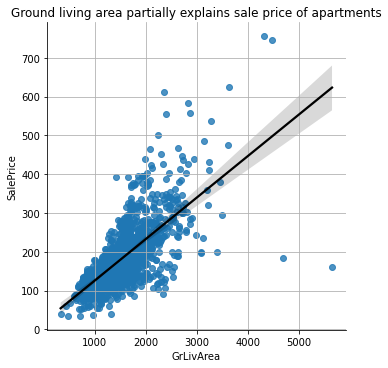

In [12]:
ax=sns.lmplot(x ='GrLivArea', y ='SalePrice', data = dt, line_kws={'color': 'k'},lowess=False)
plt.title("Ground living area partially explains sale price of apartments")
plt.grid()
plt.show()


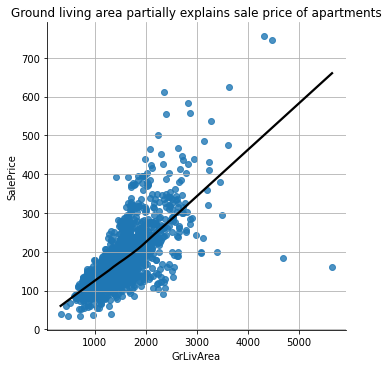

In [13]:
ax=sns.lmplot(x ='GrLivArea', y ='SalePrice', data = dt, line_kws={'color': 'k'},lowess=True)
plt.title("Ground living area partially explains sale price of apartments")
plt.grid()
plt.show()

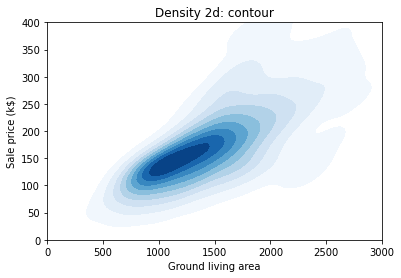

In [14]:
ax=sns.kdeplot(data=dt, x='GrLivArea', y='SalePrice', cmap='Blues', shade=True)
plt.title('Density 2d: contour')
ax.set_xlim(0, 3000)
ax.set_ylim(0, 400)
plt.xlabel('Ground living area')
plt.ylabel('Sale price (k$)')
plt.show()

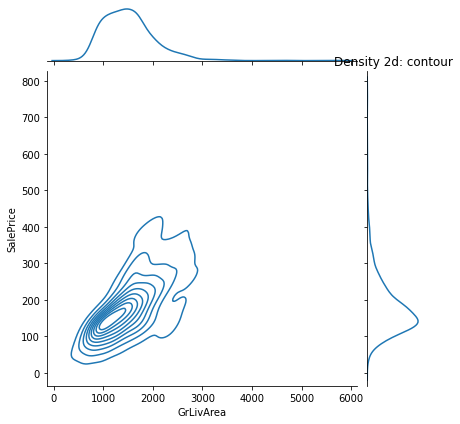

In [16]:
ax=sns.jointplot(x='GrLivArea', y='SalePrice', data=dt, kind='kde')
# ax.set_xlim(0, 3000)
# ax.set_ylim(0, 400)
plt.title('Density 2d: contour')
plt.xlabel('Ground living area')
plt.ylabel('Sale price (k$)')
plt.show()

## categoric

Story-1

In [17]:
data=pd.read_csv("https://raw.githubusercontent.com/holtzy/data_to_viz/master/Example_dataset/7_OneCatOneNum.csv")
data

,Country,Value
0,United States,12394.0
1,Russia,6148.0
2,Germany (FRG),1653.0
3,France,2162.0
4,United Kingdom,1214.0
5,China,1131.0
6,Soviet Union,NaN
7,Netherlands,1167.0
8,Italy,660.0
9,Israel,1263.0


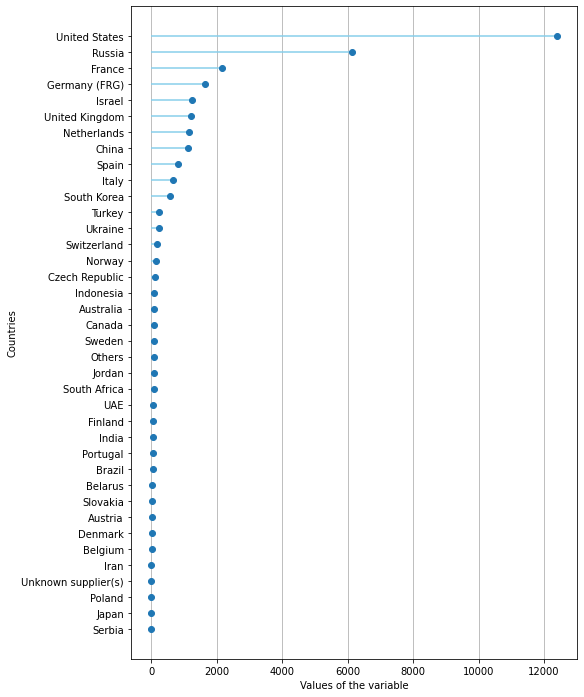

In [18]:
data2=data.dropna()

fig, ax = plt.subplots(figsize=(8,12))
ordered_df = data2.sort_values(by='Value')
# print(ordered_df)
my_range=range(1,len(data2.index)+1)
 
# The horizontal plot is made using the hline function
plt.hlines(y=my_range, xmin=0, xmax=ordered_df['Value'], color='skyblue')
plt.plot(ordered_df['Value'], my_range, "o")
 
# Add titles and axis names
plt.yticks(my_range, ordered_df['Country'])

plt.xlabel('Values of the variable')
plt.ylabel('Countries')
plt.grid(axis="x")

# Show the plot
plt.show()



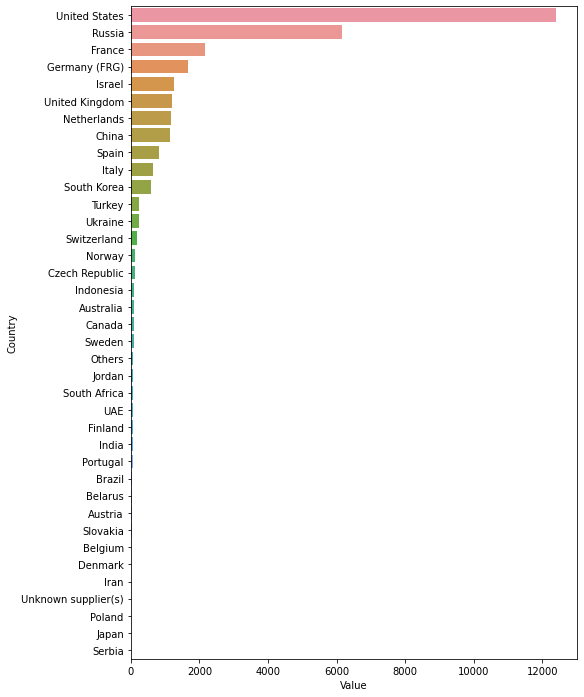

In [19]:
fig, ax = plt.subplots(figsize=(8,12))
ordered_df2 = data2.sort_values(by='Value',ascending=False)
sns.barplot(x="Value", y="Country", data=ordered_df2)

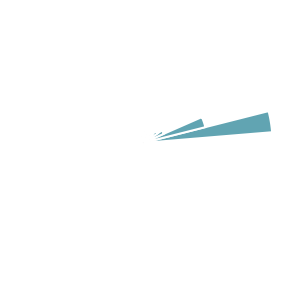

In [20]:
plt.figure(figsize=(5,5))
ax = plt.subplot(111, polar=True)
plt.axis('off')
# Set the coordinates limits
upperLimit = 13000
lowerLimit = 0

# Compute max and min in the dataset
max = ordered_df2['Value'].max()

# Let's compute heights: they are a conversion of each item value in those new coordinates
# In our example, 0 in the dataset will be converted to the lowerLimit (10)
# The maximum will be converted to the upperLimit (100)
slope = (max - lowerLimit) / max
heights = slope * ordered_df2.Value + lowerLimit

# Compute the width of each bar. In total we have 2*Pi = 360°
width = 2*np.pi / (len(ordered_df2))

# Compute the angle each bar is centered on:
indexes = list(range(1, len(ordered_df2.index)+1))
angles = [element * width for element in indexes]
angles
# Draw bars
bars = ax.bar(
    x=angles, 
    height=heights, 
    width=width, 
    bottom=lowerLimit,
    linewidth=2, 
    edgecolor="white",
    color="#61a4b2",
)

# little space between the bar and the label
labelPadding = 4

# Add labels
# for bar, angle, height, label in zip(bars,angles, heights, data["Country"]):

#     # Labels are rotated. Rotation must be specified in degrees :(
#     rotation = np.rad2deg(angle)

#     # Flip some labels upside down
#     alignment = ""
#     if angle >= np.pi/2 and angle < 3*np.pi/2:
#         alignment = "right"
#         rotation = rotation + 180
#     else: 
#         alignment = "left"

#     # Finally add the labels
#     ax.text(
#         x=angle, 
#         y=lowerLimit + bar.get_height() + labelPadding, 
#         s=label, 
#         ha=alignment, 
#         va='center', 
#         rotation=rotation, 
#         rotation_mode="anchor") 

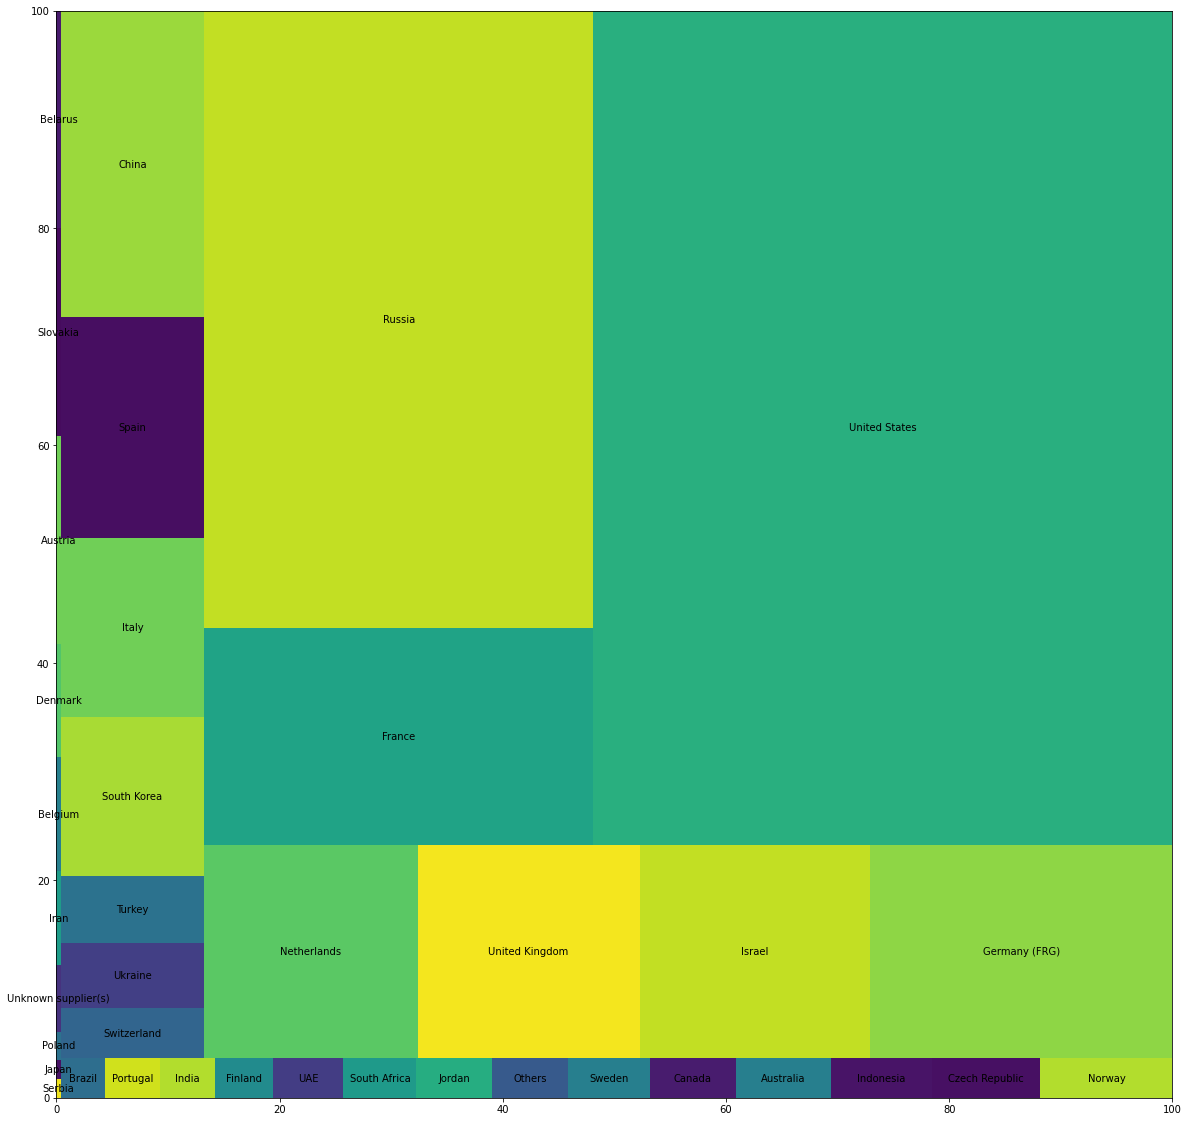

In [21]:
plt.figure(figsize=(20,20))
import squarify 
squarify.plot(sizes=ordered_df['Value'], label=ordered_df['Country'], alpha=1)
plt.show()

Story-2

In [22]:
data=pd.read_csv("https://raw.githubusercontent.com/holtzy/data_to_viz/master/Example_dataset/14_SeveralIndepLists.csv",error_bad_lines=False,sep=" ")
data

/usr/local/lib/python3.8/dist-packages/IPython/core/interactiveshell.py:3326: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version.


  exec(code_obj, self.user_global_ns, self.user_ns)


,artist,song,word
0,booba,113,paroles.net
1,booba,113,above
2,booba,113,lyrics
3,booba,113,function
4,booba,113,var
...,...,...,...
11524,nekfeu,squa,r.onreadystatechange
11525,nekfeu,squa,NaN
11526,nekfeu,squa,r.onload
11527,nekfeu,squa,s.parentnode.insertbefore


In [23]:
data.shape

(11529, 3)

In [24]:
data.isna().sum()

artist     0
song       0
word      79
dtype: int64

In [25]:
data=data.dropna()

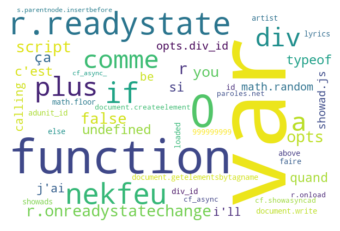

In [26]:
from wordcloud import WordCloud

mywords = data[data['artist'] == "nekfeu"].groupby('word').size().reset_index(name='freq')
mywords = mywords.sort_values('freq',ascending = False)
mywords = mywords.head(50)

# Make the plot
wordcloud = WordCloud(background_color = "white",width=600, height=400, max_words=50)
wordcloud.generate_from_frequencies(mywords.set_index('word')['freq'])

import matplotlib.pyplot as plt
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()


             word  freq
817           var    40
342      function    38
0               0    36
633  r.readystate    30
371            if    26
513        nekfeu    25
584          plus    22
56              a    22
159         comme    20
236           div    20


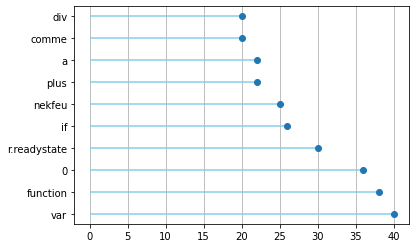

In [27]:
# fig, ax = plt.subplots(figsize=(8,12))
mywords = data[data['artist'] == "nekfeu"].groupby('word').size().reset_index(name='freq')
mywords = mywords.sort_values('freq',ascending=False)
mywords = mywords.head(10)

print(mywords)
my_range=range(1,len(mywords)+1)
 
# # The horizontal plot is made using the hline function
plt.hlines(y=my_range, xmin=0, xmax=mywords['freq'], color='skyblue')
plt.plot(mywords['freq'], my_range, "o")

plt.yticks(my_range, mywords['word'])
plt.grid(axis="x")
 

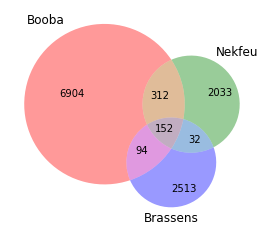

In [28]:
from matplotlib_venn import venn3
import matplotlib.pyplot as plt

booba = data[data['artist']=='booba']['word'].tolist()
nekfeu = data[data['artist']=='nekfeu']['word'].tolist()
brassens = data[data['artist']=='georges-brassens']['word'].tolist()

v = venn3([set(booba), set(nekfeu), set(brassens)], set_labels=('Booba', 'Nekfeu','Brassens'))

# Customizing the plot
v.get_label_by_id('100').set_text('{}'.format(len(booba)))
v.get_label_by_id('010').set_text('{}'.format(len(nekfeu)))
v.get_label_by_id('001').set_text('{}'.format(len(brassens)))
v.get_label_by_id('110').set_text('{}'.format(len(set(booba).intersection(nekfeu))))

# plt.savefig('venn.png', dpi = 300, format = 'png', bbox_inches = 'tight')
plt.show()


Story - 3

In [29]:
data2=pd.read_csv("https://raw.githubusercontent.com/holtzy/data_to_viz/master/Example_dataset/11_SevCatOneNumNestedOneObsPerGroup.csv",sep=";")
data2=data2[data2["value"]>-1]
data2

,region,subregion,key,value
0,Asia,Southern Asia,Afghanistan,25500100
1,Europe,Northern Europe,Åland Islands,28502
2,Europe,Southern Europe,Albania,2821977
3,Africa,Northern Africa,Algeria,37900000
4,Oceania,Polynesia,American Samoa,55519
...,...,...,...,...
245,Oceania,Polynesia,Wallis and Futuna,13135
246,Africa,Northern Africa,Western Sahara,567000
247,Asia,Western Asia,Yemen,24527000
248,Africa,Eastern Africa,Zambia,13092666


In [30]:
data2.shape

(229, 4)

In [32]:
import plotly.express as px

In [33]:
fig = px.treemap(data2, path=[px.Constant("world"), 'region','subregion', 'key'], values='value',

                  color_continuous_scale='RdBu')
fig.update_layout(margin = dict(t=50, l=25, r=25, b=25))
fig.show()

KeyError: ignored

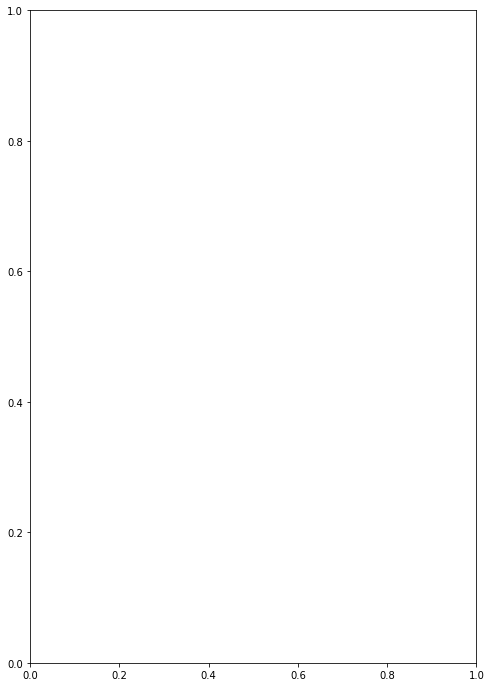

In [34]:

fig, ax = plt.subplots(figsize=(8,12))
ordered_df = data2.sort_values(by='Value')
# print(ordered_df)
my_range=range(1,len(data2.index)+1)
 
# The horizontal plot is made using the hline function
plt.hlines(y=my_range, xmin=0, xmax=ordered_df['Value'], color='skyblue')
plt.plot(ordered_df['Value'], my_range, "o")
 
# Add titles and axis names
plt.yticks(my_range, ordered_df['Country'])

plt.xlabel('Values of the variable')
plt.ylabel('Countries')
plt.grid(axis="x")

# Show the plot
plt.show()

Story - 4

In [35]:
data=pd.read_csv("https://raw.githubusercontent.com/holtzy/data_to_viz/master/Example_dataset/9_OneNumSevCatSubgroupOneObs.csv",error_bad_lines=False)
data

/usr/local/lib/python3.8/dist-packages/IPython/core/interactiveshell.py:3326: FutureWarning:

The error_bad_lines argument has been deprecated and will be removed in a future version.





,Country,TIME,Value
0,Australia,2000,17.2
1,Australia,2005,15.8
2,Australia,2010,14.0
3,Australia,2015,13.0
4,Austria,2000,23.1
...,...,...,...
105,United Kingdom,2015,17.1
106,United States,2000,23.1
107,United States,2005,19.0
108,United States,2010,18.8


In [36]:
with4 = data.groupby(by=['Country'])['TIME'].count().reset_index()
with4 = with4[with4['TIME'] == 4]
# print(with4['Country'])
data = data[data['Country'].isin(with4['Country'])]


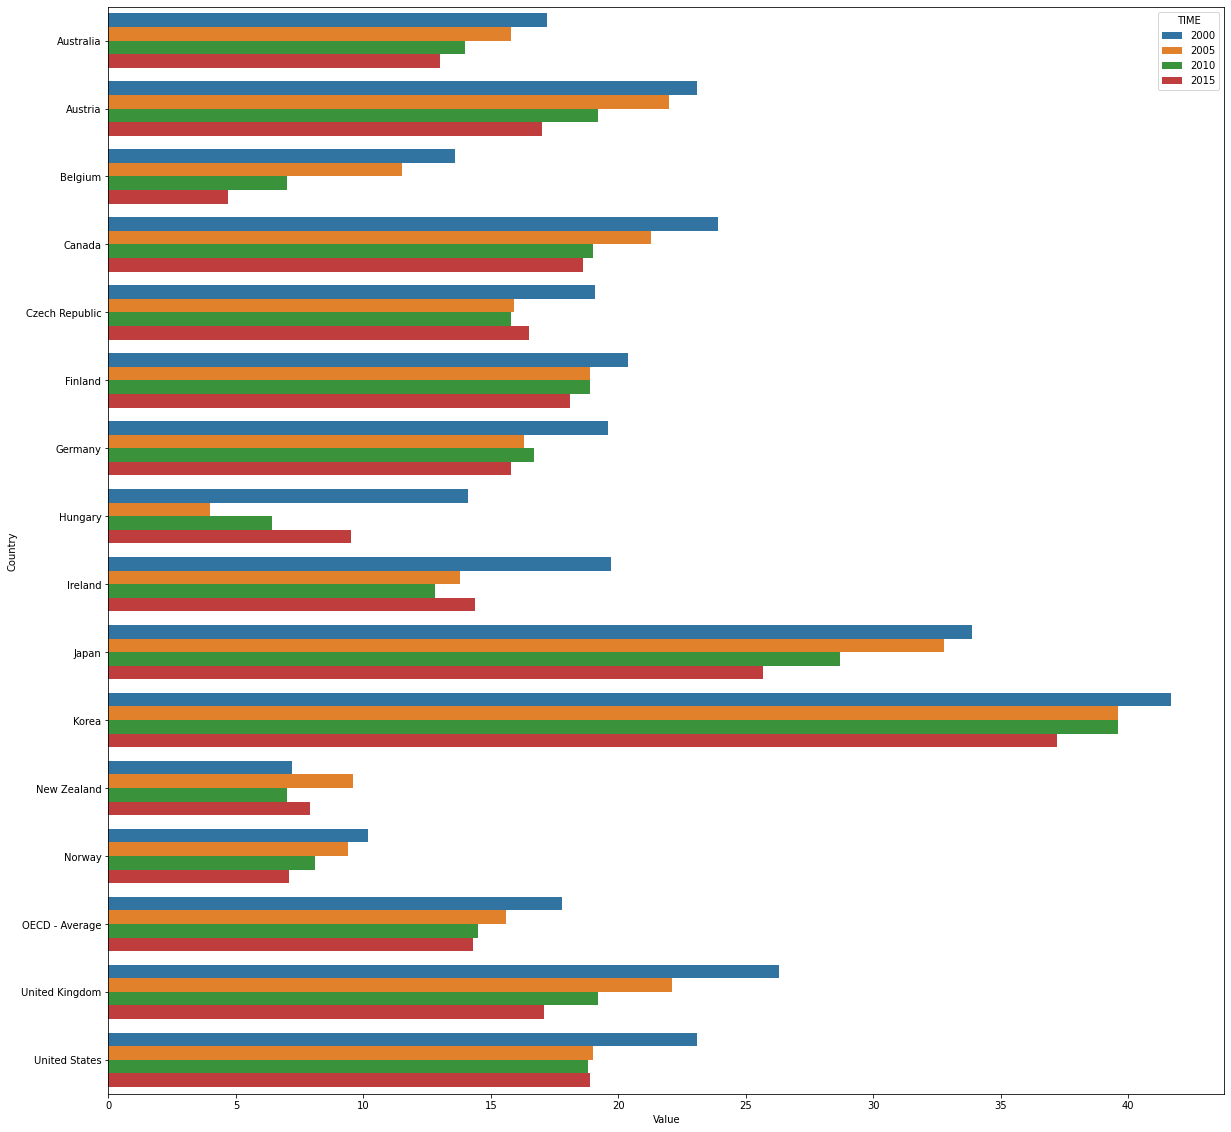

In [37]:
plt.figure(figsize=(20,20))
sns.barplot(x='Value', y='Country', hue='TIME', data=data) 

In [38]:
plt.figure(figsize=(20,20))
sns.barplot(x='Value', y=["2000","2005","2010","2015"], hue='Country', data=data) 

KeyError: ignored

<Figure size 1440x1440 with 0 Axes>